<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Ed9ar/blob/main/TecMty_kmeans_target.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 719 kB/s 
     |████████████████████████████████| 1.0 MB 30.0 MB/s 
     |████████████████████████████████| 1.7 MB 48.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 48.3 MB/s 
     |████████████████████████████████| 6.3 MB 39.7 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=f61b9a7b059d186601b1054f07c62a90184110fd2a56d2eb45ecc9a05d83df50
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=7bcf281c5fe50db9d3ba57a775201645728ee2851f1b5d05ab8a0debbefa9f35
  Stored in directory: /root/.

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [4]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [6]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

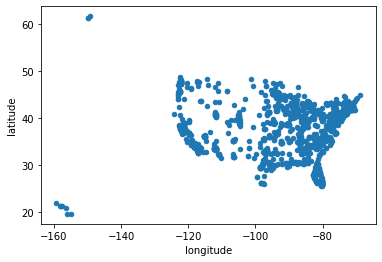

In [7]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [8]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [11]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [12]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [13]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [14]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

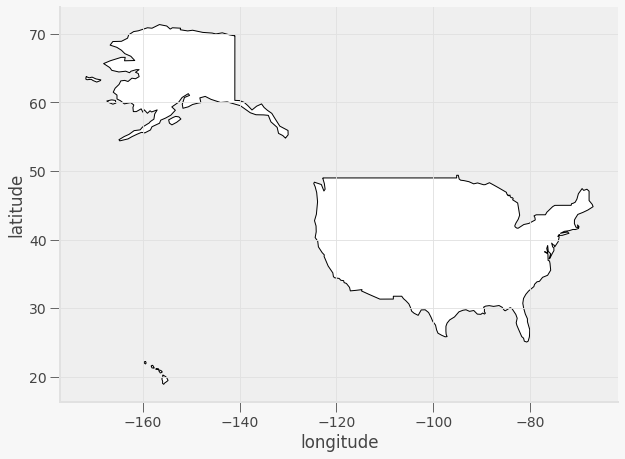

In [15]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

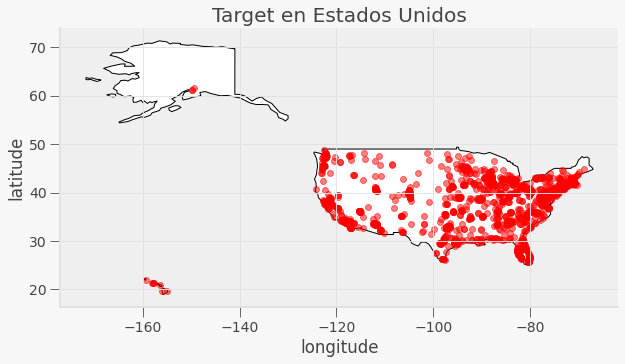

In [16]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [18]:
latlong

,latitude,longitude
0,33.224225,-86.804174
1,33.334550,-86.989778
2,30.602875,-87.895932
3,34.560148,-86.971559
4,31.266061,-85.446422
...,...,...
1834,43.034293,-88.176840
1835,42.989604,-88.259806
1836,42.846799,-106.264166
1837,41.162019,-104.800048


In [20]:
#tu codigo aquí

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Creating the data
x1 = df.longitude
x2 = df.latitude
X = list(zip(df.longitude, df.latitude))


[(-86.80417369999999, 33.2242254),
 (-86.98977789999999, 33.3345501),
 (-87.89593169999999, 30.6028747),
 (-86.9715595, 34.5601477),
 (-85.4464222, 31.2660613),
 (-87.6339077, 34.8420853),
 (-86.80555729999999, 33.6060399),
 (-87.6799946, 30.3039796),
 (-86.77509979999999, 33.467142),
 (-86.7562505, 34.7488201),
 (-86.1600739, 32.3606937),
 (-85.4050434, 32.6204324),
 (-85.7846536, 33.6092005),
 (-86.3957891, 32.4570652),
 (-87.51825509999999, 33.1923759),
 (-86.7125552, 33.425259),
 (-86.6376483, 33.6054494),
 (-86.8532462, 33.3616601),
 (-86.68163709999999, 34.7446779),
 (-86.5443483, 34.674648),
 (-88.1204442, 30.6709831),
 (-88.2260919, 30.6734013),
 (-149.4029599, 61.5779193),
 (-149.745967, 61.2299524),
 (-149.8814512, 61.13006249999999),
 (-114.5918998, 35.0528237),
 (-111.6591788, 35.1840575),
 (-111.7184273, 33.5733931),
 (-110.9601638, 32.3990239),
 (-112.4315678, 34.549193),
 (-111.6407335, 33.2552871),
 (-110.2558558, 31.5561559),
 (-112.3537192, 33.6368072),
 (-112.269511,

In [30]:
#Se hacen pruebas con un rango amplio para determinar si es necesario incluir mas o menos en las pruebas del codo
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 100)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / len(X))
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / len(X)
    mapping2[k] = kmeanModel.inertia_

In [31]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 14.519912456093243
2 : 8.467513782646103
3 : 6.451621408571851
4 : 5.444789484149738
5 : 4.443084720206242
6 : 4.300445274054383
7 : 3.8584137200941186
8 : 3.4885897106525476
9 : 3.174650007166518
10 : 2.8970270532167555
11 : 2.6707733194665555
12 : 2.6453837230784254
13 : 2.4177560545098173
14 : 2.208835712939201
15 : 2.1458058553016404
16 : 1.971132650353674
17 : 1.8442293940461423
18 : 1.7833735261133385
19 : 1.6895363401549814
20 : 1.6484640171381832
21 : 1.5136061689511653
22 : 1.4728998003046452
23 : 1.4132025439379647
24 : 1.3797466896810244
25 : 1.3409230108991865
26 : 1.2746759595726578
27 : 1.2488126782968403
28 : 1.2221705344485934
29 : 1.169309429308813
30 : 1.1596303335414946
31 : 1.113537323181931
32 : 1.1022399077552072
33 : 1.1072515181145077
34 : 1.066564199466989
35 : 1.015440371572468
36 : 0.9883440236188376
37 : 1.0014234365790982
38 : 0.9767879829423408
39 : 0.9320911292340051
40 : 0.9153079436856787
41 : 0.9114755139153282
42 : 0.8820768539398844
43 : 0.887992

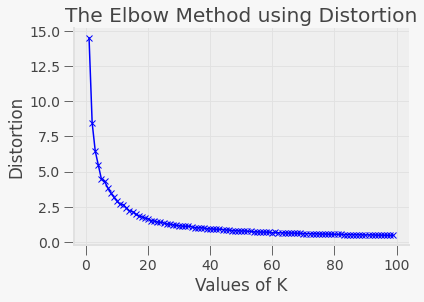

In [32]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [33]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / len(X))
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / len(X)
    mapping2[k] = kmeanModel.inertia_

In [34]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 14.519912456093243
2 : 8.467513782646103
3 : 6.451621408571851
4 : 5.442772347468968
5 : 4.446134824303659
6 : 4.279327866651223
7 : 3.8554178699980284
8 : 3.511141255653952
9 : 3.17959805897609
10 : 2.925101649567519
11 : 2.851691574307473
12 : 2.6283239413548563
13 : 2.470070543491944
14 : 2.2745165923331894
15 : 2.0996130615300275
16 : 1.9335086939732742
17 : 1.8463837865248107
18 : 1.745737195712884
19 : 1.696948208718542


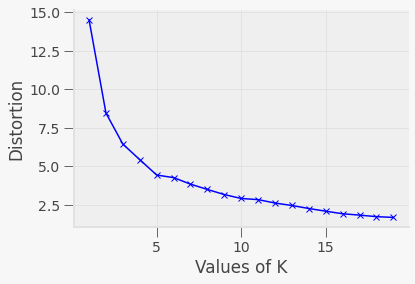

In [40]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.show()

In [ ]:
'''
Para determinar el número óptimo de clusters se busca el punto de inflexión, que en este caso es 5
'''

Número de K a utilizar 5

In [55]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(latlong)
 
print(label)

[3 3 3 ... 2 2 0]


In [56]:
label

array([3, 3, 3, ..., 2, 2, 0], dtype=int32)

In [57]:
print(X)

[(-86.80417369999999, 33.2242254), (-86.98977789999999, 33.3345501), (-87.89593169999999, 30.6028747), (-86.9715595, 34.5601477), (-85.4464222, 31.2660613), (-87.6339077, 34.8420853), (-86.80555729999999, 33.6060399), (-87.6799946, 30.3039796), (-86.77509979999999, 33.467142), (-86.7562505, 34.7488201), (-86.1600739, 32.3606937), (-85.4050434, 32.6204324), (-85.7846536, 33.6092005), (-86.3957891, 32.4570652), (-87.51825509999999, 33.1923759), (-86.7125552, 33.425259), (-86.6376483, 33.6054494), (-86.8532462, 33.3616601), (-86.68163709999999, 34.7446779), (-86.5443483, 34.674648), (-88.1204442, 30.6709831), (-88.2260919, 30.6734013), (-149.4029599, 61.5779193), (-149.745967, 61.2299524), (-149.8814512, 61.13006249999999), (-114.5918998, 35.0528237), (-111.6591788, 35.1840575), (-111.7184273, 33.5733931), (-110.9601638, 32.3990239), (-112.4315678, 34.549193), (-111.6407335, 33.2552871), (-110.2558558, 31.5561559), (-112.3537192, 33.6368072), (-112.269511, 33.4236583), (-114.6061139, 32.7

In [89]:
X=latlong.loc[:,['longitude','latitude']]

kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:2]]) # Labels of each point
X.head(10)

,longitude,latitude,cluster_label
0,-86.804174,33.224225,3
1,-86.989778,33.334550,3
2,-87.895932,30.602875,1
3,-86.971559,34.560148,3
4,-85.446422,31.266061,1
5,-87.633908,34.842085,3
6,-86.805557,33.606040,3
7,-87.679995,30.303980,1
8,-86.775100,33.467142,3
9,-86.756250,34.748820,3


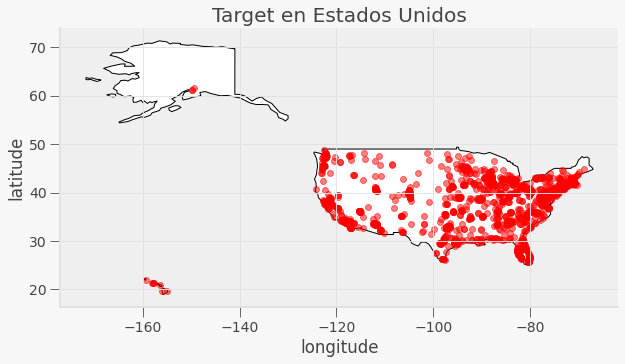

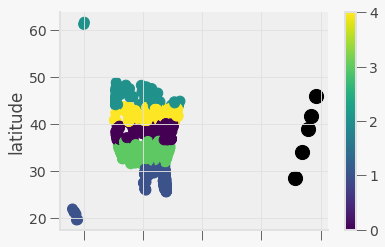

In [98]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)
X.plot.scatter(x = 'longitude', y = 'latitude', c=labels, s=100, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 0], c='black', s=200, alpha=1)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [99]:
centers

array([[38.85514694],
       [28.51827203],
       [45.98620578],
       [34.13534794],
       [41.75386896]])

In [102]:
gdf

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)
...,...,...,...,...,...,...,...
1834,Waukesha,43.034293,-88.176840,"2401 Kossow Rd, Waukesha, WI 53186-2904",262-784-8646,https://www.target.com/sl/waukesha/82,POINT (-88.17684 43.03429)
1835,Waukesha South,42.989604,-88.259806,"1250 W Sunset Dr, Waukesha, WI 53189-8423",262-832-1272,https://www.target.com/sl/waukesha/2546,POINT (-88.25981 42.98960)
1836,Casper,42.846799,-106.264166,"401 SE Wyoming Blvd, Casper, WY 82609-4219",307-265-8214,https://www.target.com/sl/casper/164,POINT (-106.26417 42.84680)
1837,Cheyenne,41.162019,-104.800048,"1708 Dell Range Blvd, Cheyenne, WY 82009-4945",307-637-8888,https://www.target.com/sl/cheyenne/224,POINT (-104.80005 41.16202)


Una vez que graficamos fue posible confirmar que el K es bastante bueno, ya que vemos suficiente división en las latitudes seleccionadas, en lo vertical. Si visualizamos esta información junto al mapa de estados unidos vemos que los grupos hacen sentido respecto a las latitudes y longitudes de las ciudades. El tener 5 almacenes en el los centros de estos grupos disiminuiría de forma considerable los costos de inventario y distribución ya que las distancias al punto quedarían optimizadas para las tiendas.
En cuanto a las ciudades donde estarian, al comparar con la información geografica encuentro que los mejores puntos serian las siguientes ciudades

Birdcage Citrus Heights
Burbank California
Oviedo Florida
Longmont Colorado
Chicago Illinnois

 K means- Visualización.
Desarrolla una búsqueda de librerías que ayudan al entendimiento de datos geográficos (minimo enunciar 3 librerías).
Además incluye la relevancia de utilizarlas y da su opinión al respecto.

Algunas de las librerias más populares son Matplotlib, Seaborn y Ggplot. Estas nos ayudan a graficar en varios casos, por ejemplo matplotlib es capaz de graficar datos de geopandas con mapas ya disponibles como parte de su material. Mientras que seaborn y ggplot nos ayudan a entender a fondo la relación de nuestros datos, heatmapas serian un ejemplo. La verdad es que matplotlib con pyplot puede ofrecernos casi todas las soluciones en cuanto a visdualización.

Es importante graficar en el mapa sobre todo por el factor de negocio, si bien un cientifico de datos puede facilmente identificar la información valiosa de un material visual aun sin el mapa, al presentarla al otros se busca darles contexto sencillo para la toma de decisiones. En este caso en particular si nosotros somos capaces de entender porque los clusters y sus centros maximizan nuestro desempeño como empresa, estamos logrando los objetivos, además de que somos capaces de incluso identificar estos puntos dentro de un espacio que ya conocemos (mapa).
